num of stocks 1046
table.csv?s=600570.ss
table.csv?s=600647.ss
table.csv?s=600679.ss
table.csv?s=600777.ss
table.csv?s=600892.ss
table.csv?s=601116.ss
table.csv?s=601299.ss


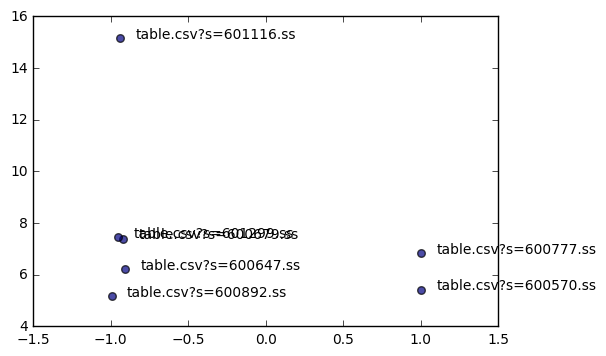

In [1]:
#this script calculate the stock vector and catagory them to different group
import os
import sys
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt 
os.system("rm list.txt")
os.system("rm data/list")
os.system("ls data>list.txt")
fp=open('list.txt')
namelist=fp.read()
namelist=namelist.split('\n')
print("num of stocks %d")%(len(namelist))
numstock=len(namelist)

def pullpower(data):
        sum_pull=0
        data=data-data[0]
        for i in range(0,len(data)):
                if(data[i]>0):
                        sum_pull+=data[i]
        return sum_pull


def pushpower(data):
        sum_push=0
        data=data-data[0]
        for i in range(0,len(data)):
                if(data[i]<0):
                        sum_push+=data[i]
        return abs(sum_push)

def pushpull(data):
        pull=pullpower(data)
        push=pushpower(data)
	if(pull==0 or push==0):
		level=0
        else:
		level=(pull-push)/(pull+push)
	return level
def stock_vector_gen(name):
	data=pd.read_csv('data/'+name)
	#meanv=np.mean(data['High'].head(50))
	lvl=pushpull(data['High'].head(200))
	variation=np.std(data['High'].head(50))
	return (lvl,variation)


for i in range(500,numstock-1):
	x,y=stock_vector_gen(namelist[i])
	T=np.sin(x+y)
	if (y>=5):
		print(namelist[i])
		plt.text(x+0.1,y,namelist[i])
		plt.scatter(x,y,c=T,s=30,alpha=0.7)
plt.show()	







In [2]:
#process whole database-->file-->dataframe
#pulling and pushing the market
import os
import sys
import numpy as np 
import pandas as pd
import  matplotlib.pyplot as plt 
from predict import predict
os.system("rm list.txt")
os.system("rm data/list")
os.system("ls data>list.txt")
fp=open('list.txt')
namelist=fp.read()
namelist=namelist.split('\n')
print("num of stocks %d")%(len(namelist))
predict.test(1)
StockNum=len(namelist)

rt=0
wr=0
dw=0
up=0		
for i in range(0,StockNum-1): #for every file
	data=pd.read_csv('data/'+namelist[i])
	#lvl,st=pushpull((data['Low'].head(200)))	
	st='pushing'
	actual=data['High'][0]-data['Open'][5]
	if(st=='pushing'):
		if(actual<0):
			rt+=1
			dw+=1
		else:
			wr+=1
			up+=1
	if(st=='pulling'):
		if(actual<0):
			wr+=1
			dw+=1
		else:
			up+=1
			rt+=1
	#print(namelist[i]+':'+'level:'+str(lvl)+'status'+st)

print("wrong num[%d] right num[%d]")%(wr,rt)

print("down num[%d] up num[%d]")%(dw,up)



num of stocks 1046
wrong num[919] right num[126]
down num[126] up num[919]


I think all the predict function should use same return pattern 
It could be simple like such tuple (upOrDown,fiveDayLevel)
